#### How do the distributions look for the different datasets and as we go up higher the hierarchy?

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [48]:
data_dir = "../../Data/"

In [49]:
#since we are interested in the P(x|Y=1) we sample accordingly
def read_data(filename):
    data = pd.read_csv(filename)
    data = data.loc[data['virus'] == 1]
    return data

In [50]:
symptoms = ['fever','cough','muscle','sorethroat']

In [148]:
#check if all values are present or not
def dist_dict(dict_):
    ans = [0,0]
    if 0 in dict_.keys():
        ans[0] = dict_[0]
    if 1 in dict_.keys():
        ans[1] = dict_[1]
    return ans

In [171]:
#get the conditonal probabilities for the gender
def gender_prob(df,symp):
    dist = defaultdict()
    
    #get the conditional probability distribution for males
    dist['male'] = dist_dict(df.loc[df['male'] == 1][symp].value_counts()) #/\
#                 df.loc[df['male']==1][symp].count()
    
    #get the conditional probability distribution for females
    dist['female'] = dist_dict(df.loc[df['female'] == 1][symp].value_counts()) #/\
#                 df.loc[df['female']==1][symp].count()
    
    #get the conditional probability distribution for age 0-4
    dist['age 0-4'] = dist_dict(df.loc[df['age 0-4'] == 1][symp].value_counts()) #/\
#                 df.loc[df['age 0-4']==1][symp].count()
    
    dist['age 5-15'] = dist_dict(df.loc[df['age 5-15'] == 1][symp].value_counts())#/\
#                 df.loc[df['age 5-15']==1][symp].count()
    
    dist['age 16-44'] = dist_dict(df.loc[df['age 16-44'] == 1][symp].value_counts())#/\
#                 df.loc[df['age 16-44']==1][symp].count()
    
    dist['age 45-64'] = dist_dict(df.loc[df['age 45-64'] == 1][symp].value_counts())#/\
#                 df.loc[df['age 45-64']==1][symp].count()
    
    dist['age 65+'] = dist_dict(df.loc[df['age 65+'] == 1][symp].value_counts())#/\
#                 df.loc[df['age 65+']==1][symp].count()
    
    dist = pd.DataFrame.from_dict(dist)
    return dist

In [172]:
#returns the probabilities of the values in a list
def prob(data):
    x = data['fever']
    vector = data.groupby('fever').size().div(len(data))

    vector = data.groupby('cough').size().div(len(data))
    
    vector = data.groupby('muscle').size().div(len(data))
    
    vector = data.groupby('sorethroat').size().div(len(data))
    

In [208]:
#input is list of tuples, where first element is the symptom and\
#second element is the pandas dataframe with the distribution
def plot_dist_demo(list_,name):
    for item in list_:
        i = item[1]
        ans_0 = list(i['male'])
        ans_1 = list(i['female'])
        plt.figure(figsize=(14,10))
        fig,ax = plt.subplots()
        index = np.arange(2)
        bar_width = 0.35
        opacity = 0.6
        rects1 = plt.bar(index, ans_0, bar_width,
        alpha=opacity,
        color='b',
        label='Male')

        rects2 = plt.bar(index + bar_width, ans_1, bar_width,
        alpha=opacity,
        color='g',
        label='Female')

        plt.xlabel('Symptom Value',fontsize = 12)
        plt.ylabel('Freqency',fontsize = 12)
        plt.title('Distribution of ' + item[0]+ " across gender",fontsize =12)
        plt.xticks(index + bar_width/2 , ('0','1'),fontsize = 12)
        plt.legend()
        plt.savefig("../Distributions/"+name+"/"+item[0]+".pdf",bounds="tight")
#         plt.tight_layout()
#         plt.show()
        plt.close()
        

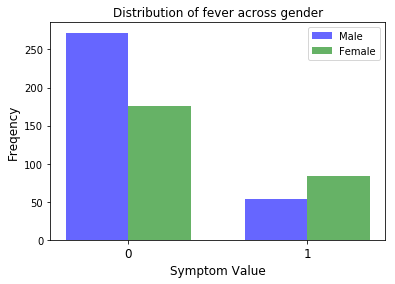

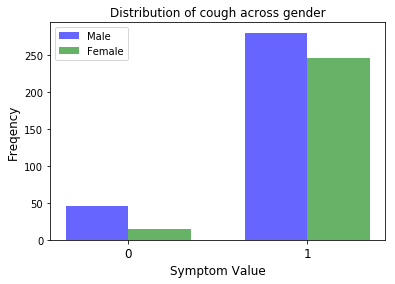

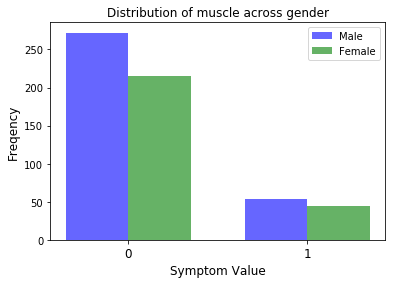

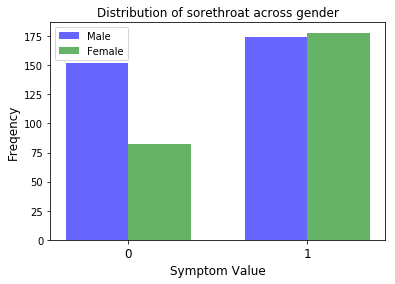

In [212]:
if __name__ == '__main__':
    fw = read_data(data_dir+"hutterite.csv")
    dist_df = pd.DataFrame(columns = ['male','female','age 0-4','age 5-15'\
                                     'age 16-44','age 45-64','age 65+'])
    temp = []

    for symp in symptoms: 
        dist_symp = gender_prob(fw,symp)
        temp.append((symp,dist_symp))
    plot_dist_demo(temp,'Hutterite')